In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nbimporter
from sklearn.metrics import silhouette_samples, silhouette_score

from preprocessamento import *

from sklearn.cluster import KMeans

Importing Jupyter notebook from preprocessamento.ipynb


In [2]:
dados_2015 = pd.read_csv('../arquivos/2015.csv')
dados_2016 = pd.read_csv('../arquivos/2016.csv')

In [3]:
df_2015 = preprocessar(dados_2015)
df_2016 = preprocessar(dados_2016)

frames = [df_2015, df_2016]

data_frame = pd.concat(frames)

For n_clusters = 2 The average silhouette_score is : 0.13691037273463436


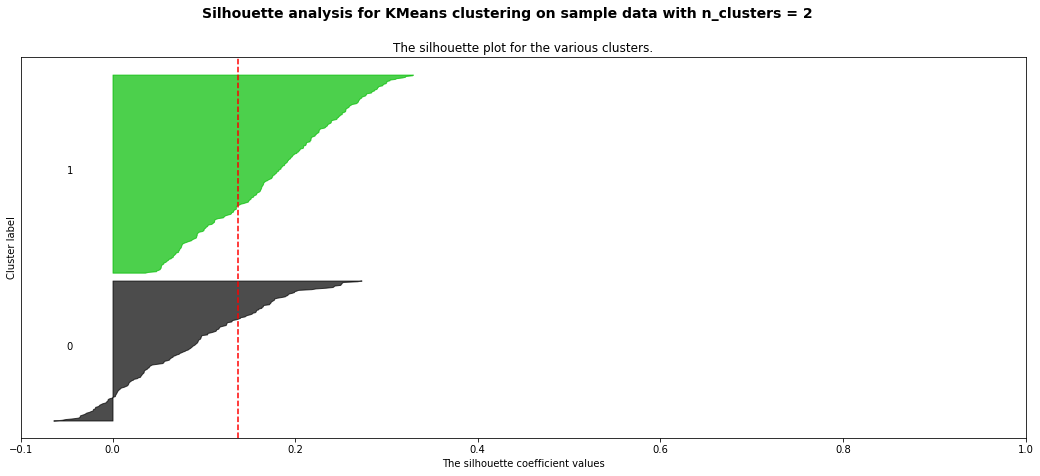

For n_clusters = 3 The average silhouette_score is : 0.11994878536341047


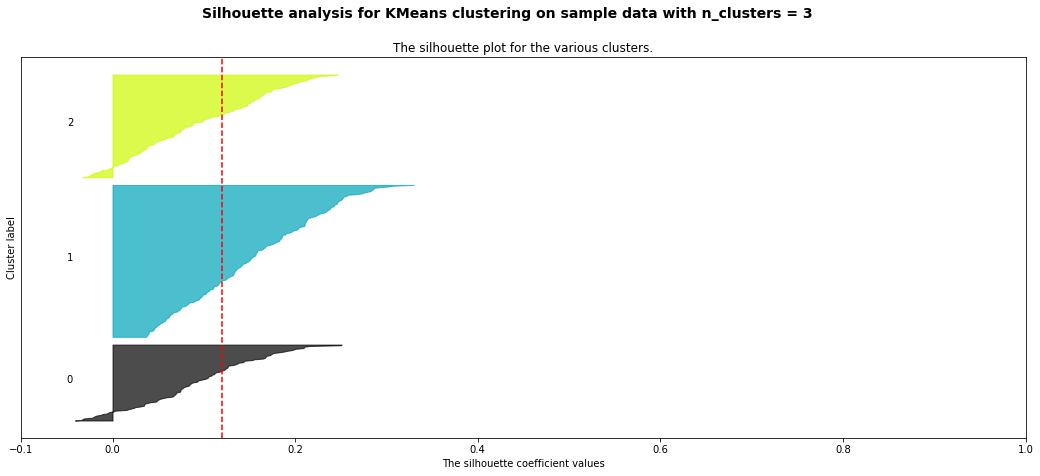

For n_clusters = 4 The average silhouette_score is : 0.11189847780503033


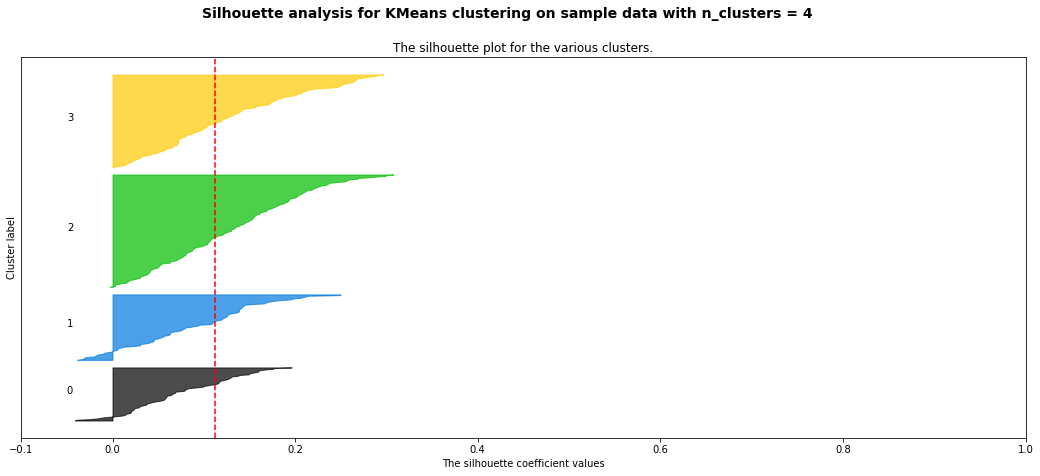

For n_clusters = 5 The average silhouette_score is : 0.09777509128412397


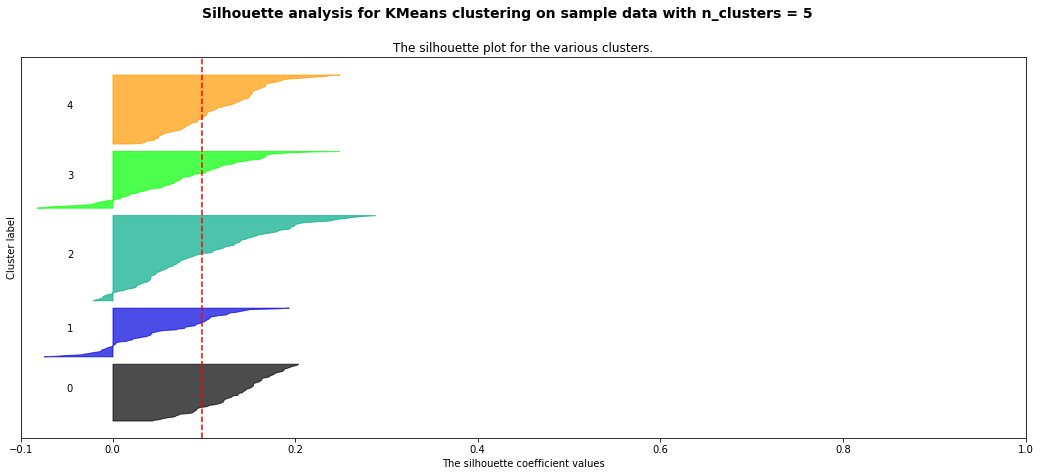

For n_clusters = 6 The average silhouette_score is : 0.11252351193553055


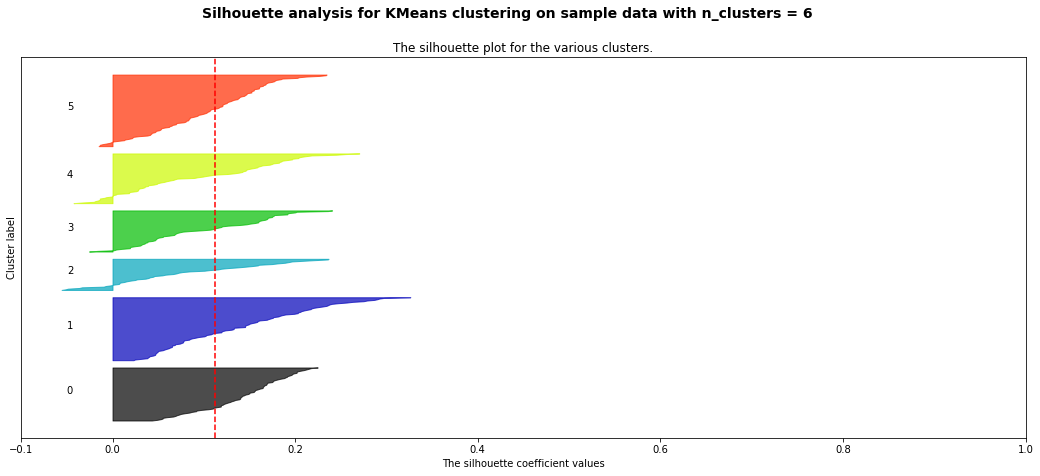

For n_clusters = 7 The average silhouette_score is : 0.111321775547532


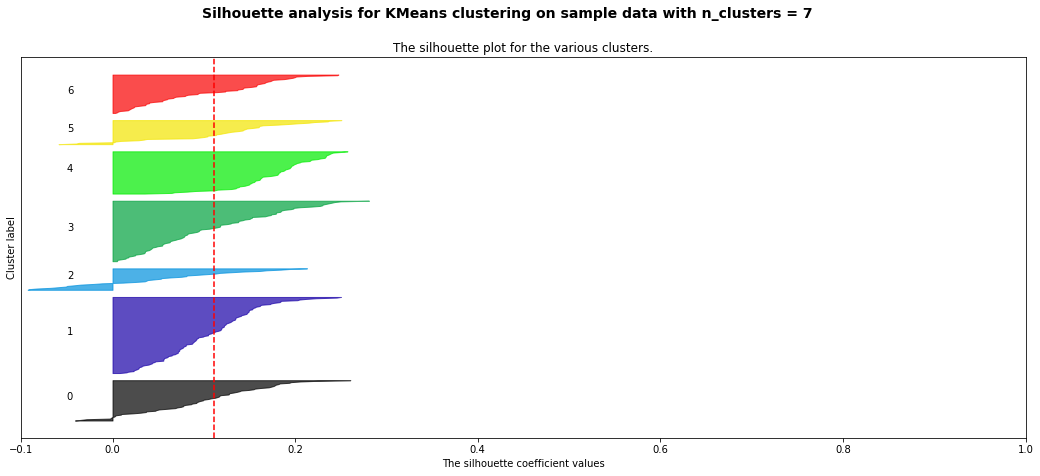

For n_clusters = 8 The average silhouette_score is : 0.10595215373255326


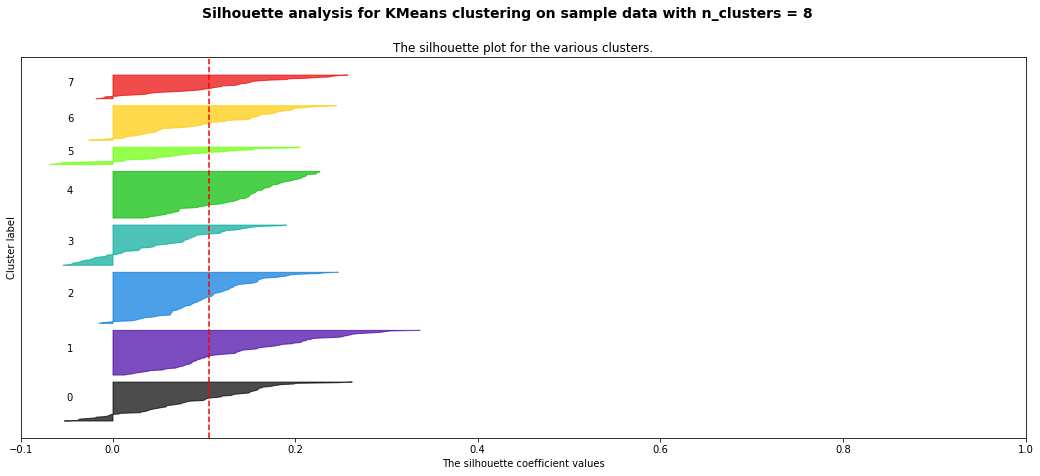

For n_clusters = 9 The average silhouette_score is : 0.10323057963482711


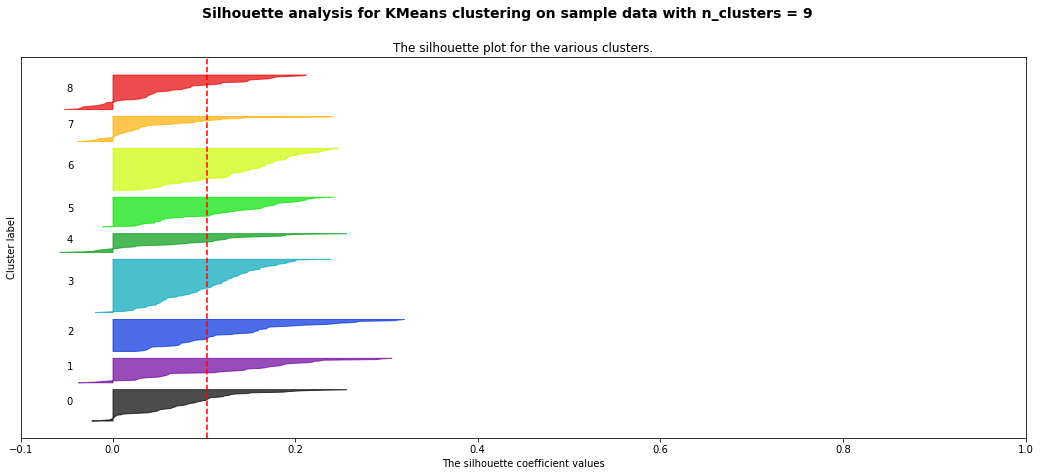

For n_clusters = 10 The average silhouette_score is : 0.1011368444583527


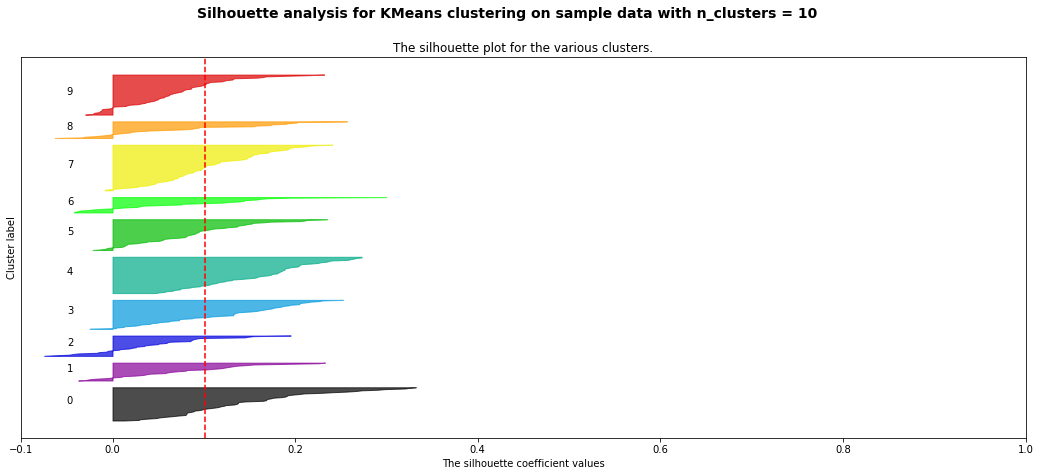

In [16]:
n_clusters = [2,3,4,5,6,7,8,9,10]

modelos_kmeans = 10

for n_cluster in n_clusters:
    # cria um plot
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # define até onde o gráfico vai
    ax1.set_xlim([-0.1, 1])
    
    # inicializa o cluster com k = n_clusters
    clusterer = KMeans(n_clusters=n_cluster,
                       init='k-means++', 
                       n_init=10, 
                       max_iter=300, 
                       random_state=0)
    
    cluster_labels = clusterer.fit_predict(data_frame)
    
    # O silhouette_score nos dá um valor média para todos os clusteres
    silhouette_avg = silhouette_score(data_frame, cluster_labels)
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", silhouette_avg)
    
    # calcula os valores de cada objetivo
    sample_silhouette_values = silhouette_samples(data_frame, cluster_labels)
    y_lower = 10
    for i in range(n_cluster):
        # junta os silhouette scores para todos os elementos dentro do cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.show()

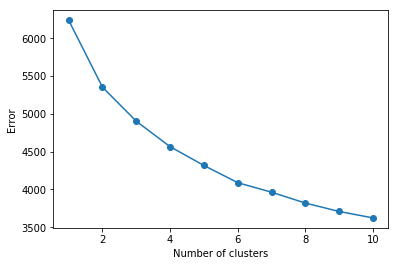

In [14]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(data_frame)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()